In [2]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def parseMatOutput(filePath):
    mat = scipy.io.loadmat(filePath)
    ### order ###
    # mids, rhoFull, dxAvgFull, structureFull, hybridFull, windingFull, backtrackingFull, backtrackingFullRaw, collistionsFull, collisionsFullRaw
    
    #output full
    output_full, output, params = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    output_full.index = mat['Data'][0][0][0][0]
    for n,i in enumerate(mat['Data'][0][0][1]): #rhoFull
        output_full['data_'+str(n)] = n
    
    #output
    output['nParticles'] = [i[0] for i in mat['Data'][0][0][10]]
    output['xEnd'] = [i[0] for i in mat['Data'][0][0][11]]
    output['xEndPremature'] = [i[0] for i in mat['Data'][0][0][12]]
    output['tTaken'] = [pd.Series(i).mean() for i in mat['Data'][0][0][13].T]
    
    #parameters  
    param_temp = [i[0] for i in mat['Data'][0][0][14][0][0]]
    param_clean = []
    for i in param_temp:
        if type(i) == np.ndarray:           
            param_clean.append(i[0])
        else:
            param_clean.append(i)
            
    names = ['sigma','outOfBound','rpa12Cleavage','minRange','RNAPbubble','hybridFile','saveHistOnly','nRuns','tMax','dt','structureFile','c','dist','v5end','addProb','vInt','preTermProb','preTermDist','backtrackingVelocity','rnt1Cleavage','structure2consider','structureStrength','hybridStrength','name']
    params.index = names
    params['run'] = param_clean
    
    return output, params



path = "/mnt/c/Users/tturo/OneDrive - University of Edinburgh/model_RNAPI_matlab/20230112_termination_simulations/Data/"

df00_output = pd.DataFrame()
for f in os.listdir(path):
    if f.endswith(".mat"):
        output, params = parseMatOutput(path+f)
        
#         print(output)
#         print(params)
        
        params = params.to_dict()['run']
        
        #coefficient to multiply nRuns 
        if params['tMax'] == 6000:
            coef = (150 * 0.5) / params['nRuns']
        else:
            exit("tMax different than 6000")
        
        data = {
            'time'        : params['tMax'],
            'c'           : params['c'],
            'dist'        : params['dist'],
            'v5end'       : params['v5end'],
            'addProb'     : params['addProb'],
            'vInt'        : params['vInt'],
            'preTermProb' : params['preTermProb'],
            'preTermDist' : params['preTermDist'],
            'nParticles'    : output['nParticles'].mean(),
            'xEnd'          : output['xEnd'].sum() * coef,
            'xEndPremature' : output['xEndPremature'].sum() * coef,
            'tTaken'        : output['tTaken'].mean()
        }
        
        
        df00_output[params['name']] = data
        
df00_output

,discrete_0.1,discrete_0.2,discrete_0.4,discrete_0.3,discrete_0.5,discrete_0.6,discrete_0.7,discrete_0.8,discrete_0.9,discrete_1.0,...,Full_0.8_term_0.1,Full_0.8_term_0.2,Full_0.8_term_0.3,Full_0.8_term_0.4,Full_0.8_term_0.5,Full_0.8_term_0.6,Full_0.8_term_0.7,Full_0.8_term_0.9,Full_0.8_term_0.8,Full_0.8_term_1.0
time,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
dist,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
v5end,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
addProb,0.100000,0.200000,0.400000,0.300000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000,...,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000
vInt,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
preTermProb,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.900000,0.800000,1.000000
preTermDist,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000
nParticles,13.488125,25.018500,43.239750,35.339500,51.249875,58.515375,64.461875,70.655375,76.910750,82.085500,...,44.889625,42.730125,40.675125,38.965375,36.847125,35.335750,33.955125,31.289500,32.447750,29.884750
xEnd,40959.375000,75937.500000,130884.375000,107100.000000,154875.000000,176400.000000,193818.750000,208987.500000,224728.125000,238996.875000,...,161953.125000,149362.500000,137568.750000,127621.875000,116437.500000,107981.250000,100509.375000,86371.875000,92700.000000,79528.125000


In [3]:
#processivity
df00_output = df00_output.T
df00_output['processivity'] = df00_output['xEnd'] / (df00_output['xEnd'] + df00_output['xEndPremature'])
df00_output = df00_output.T
df00_output

,discrete_0.1,discrete_0.2,discrete_0.4,discrete_0.3,discrete_0.5,discrete_0.6,discrete_0.7,discrete_0.8,discrete_0.9,discrete_1.0,...,Full_0.8_term_0.1,Full_0.8_term_0.2,Full_0.8_term_0.3,Full_0.8_term_0.4,Full_0.8_term_0.5,Full_0.8_term_0.6,Full_0.8_term_0.7,Full_0.8_term_0.9,Full_0.8_term_0.8,Full_0.8_term_1.0
time,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
dist,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
v5end,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
addProb,0.100000,0.200000,0.400000,0.300000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000,...,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000
vInt,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
preTermProb,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.900000,0.800000,1.000000
preTermDist,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000
nParticles,13.488125,25.018500,43.239750,35.339500,51.249875,58.515375,64.461875,70.655375,76.910750,82.085500,...,44.889625,42.730125,40.675125,38.965375,36.847125,35.335750,33.955125,31.289500,32.447750,29.884750
xEnd,40959.375000,75937.500000,130884.375000,107100.000000,154875.000000,176400.000000,193818.750000,208987.500000,224728.125000,238996.875000,...,161953.125000,149362.500000,137568.750000,127621.875000,116437.500000,107981.250000,100509.375000,86371.875000,92700.000000,79528.125000


<AxesSubplot:>

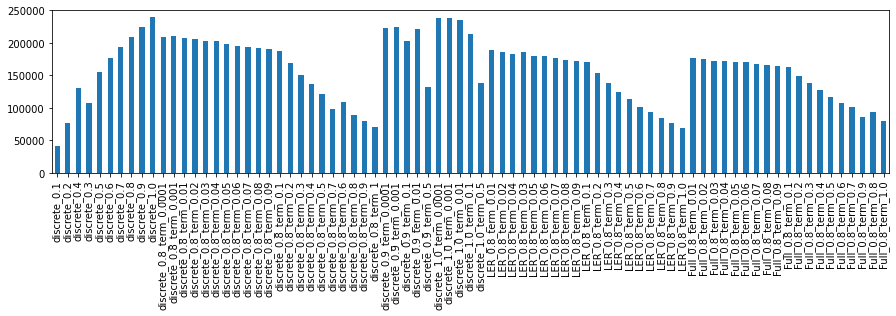

In [7]:
df00_output.T['xEnd'].plot.bar(figsize=(15,3))

In [19]:
modelType = df00_output.columns.to_series().str.split("_",expand=True)[0]
a = df00_output.T
a['modelType'] = modelType
df00_output = a.T
df00_output

,discrete_0.1,discrete_0.2,discrete_0.4,discrete_0.3,discrete_0.5,discrete_0.6,discrete_0.7,discrete_0.8,discrete_0.9,discrete_1.0,...,Full_0.8_term_0.1,Full_0.8_term_0.2,Full_0.8_term_0.3,Full_0.8_term_0.4,Full_0.8_term_0.5,Full_0.8_term_0.6,Full_0.8_term_0.7,Full_0.8_term_0.9,Full_0.8_term_0.8,Full_0.8_term_1.0
time,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,...,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
dist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
v5end,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
addProb,0.1,0.2,0.4,0.3,0.5,0.6,0.7,0.8,0.9,1.0,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
vInt,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
preTermProb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9,0.8,1.0
preTermDist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6750.0,6750.0,6750.0,6750.0,6750.0,6750.0,6750.0,6750.0,6750.0,6750.0
nParticles,13.488125,25.0185,43.23975,35.3395,51.249875,58.515375,64.461875,70.655375,76.91075,82.0855,...,44.889625,42.730125,40.675125,38.965375,36.847125,35.33575,33.955125,31.2895,32.44775,29.88475
xEnd,40959.375,75937.5,130884.375,107100.0,154875.0,176400.0,193818.75,208987.5,224728.125,238996.875,...,161953.125,149362.5,137568.75,127621.875,116437.5,107981.25,100509.375,86371.875,92700.0,79528.125


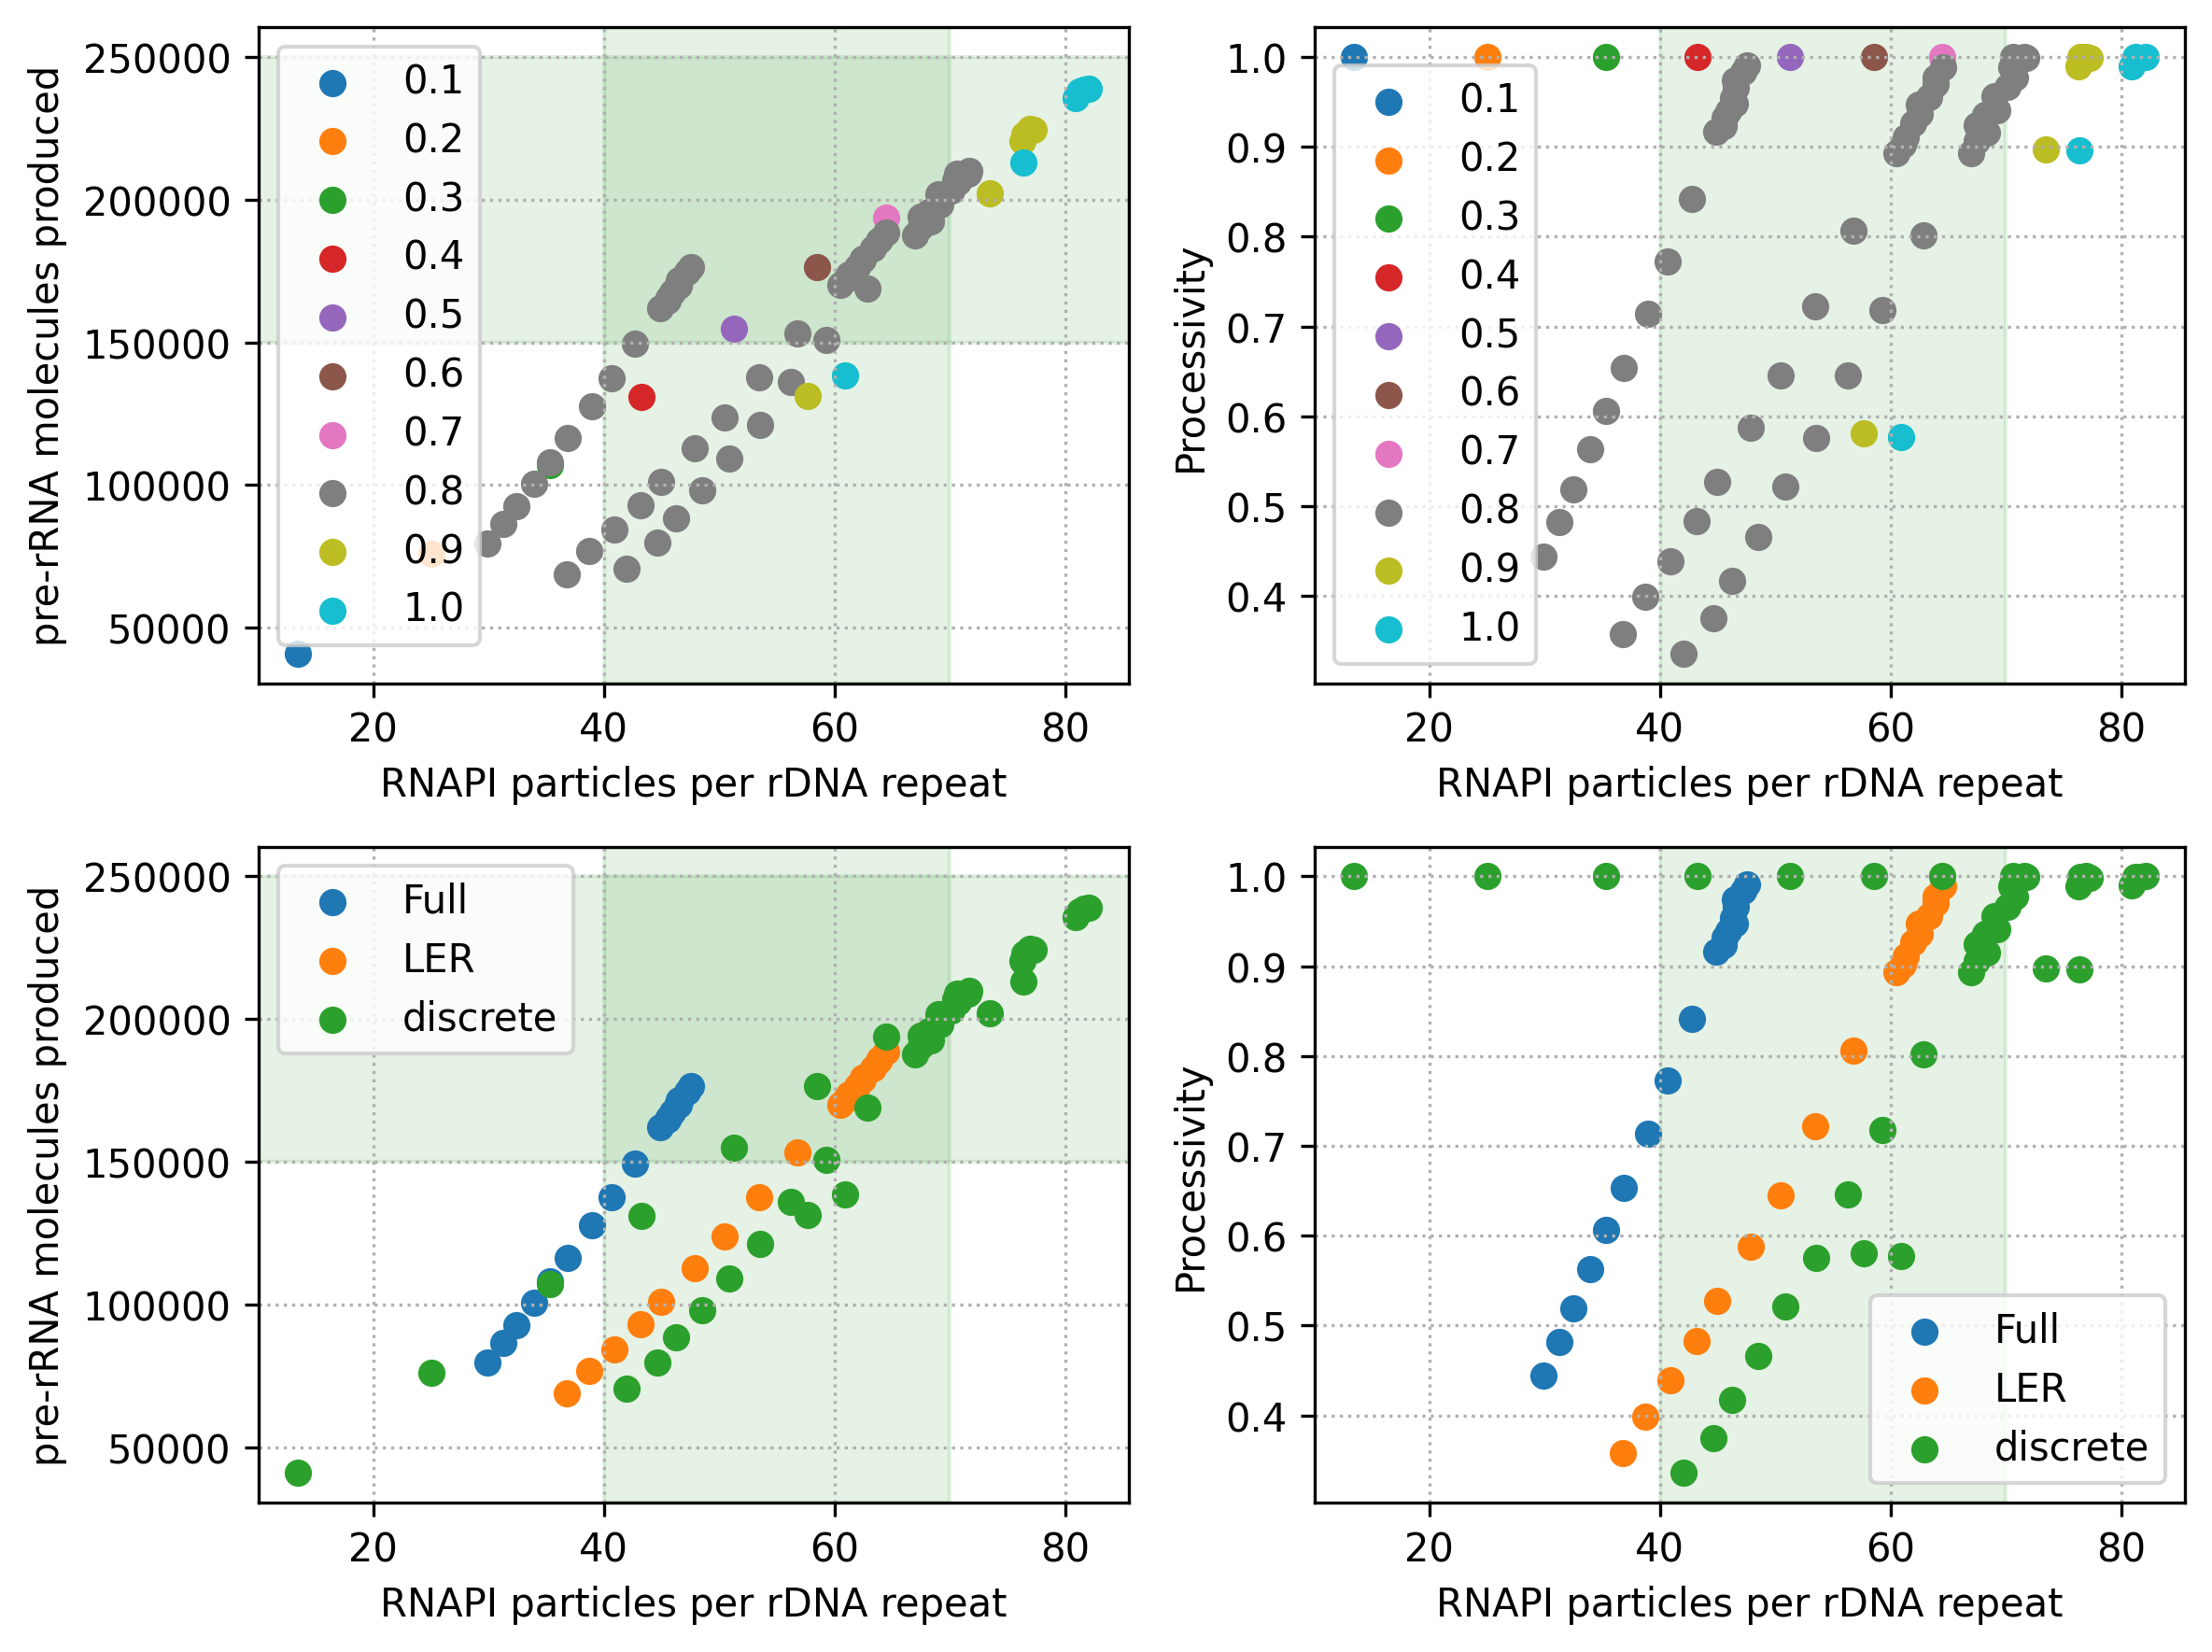

In [23]:
figsize=(8,6)
texts = []
data = df00_output.T
title = ''

fig = plt.figure(figsize=figsize, dpi=300)

#panel 1
ax1 = fig.add_subplot(2,2,1)
ax1.axvspan(40,70,color='green',alpha=0.1)
ax1.axhspan(150000,250000,color='green',alpha=0.1)

for group, df_temp in data.groupby('addProb'):
    a = df_temp['nParticles'].tolist()
    b = df_temp['xEnd'].tolist()
    ax1.scatter(x=a ,y=b ,label=group, cmap="paired")
#     for x, y, s in zip(a, b, df_temp.index.tolist()):
#         texts.append(plt.text(x, y, s))

ax1.legend()
ax1.grid(True,ls="dotted")
ax1.set_xlabel('RNAPI particles per rDNA repeat')
ax1.set_ylabel('pre-rRNA molecules produced')

#panel 2
ax2 = fig.add_subplot(2,2,2)
ax2.axvspan(40,70,color='green',alpha=0.1)
# ax1.axhspan(0,1,color='green',alpha=0.1)

for group, df_temp in data.groupby('addProb'):
    a = df_temp['nParticles'].tolist()
    b = df_temp['processivity'].tolist()
    ax2.scatter(x=a ,y=b ,label=group, cmap="paired")
#     for x, y, s in zip(a, b, df_temp.index.tolist()):
#         texts.append(plt.text(x, y, s))

ax2.legend()
ax2.grid(True,ls="dotted")
ax2.set_xlabel('RNAPI particles per rDNA repeat')
ax2.set_ylabel('Processivity')

#panel 3
ax1 = fig.add_subplot(2,2,3)
ax1.axvspan(40,70,color='green',alpha=0.1)
ax1.axhspan(150000,250000,color='green',alpha=0.1)

for group, df_temp in data.groupby('modelType'):
    a = df_temp['nParticles'].tolist()
    b = df_temp['xEnd'].tolist()
    ax1.scatter(x=a ,y=b ,label=group, cmap="paired")
#     for x, y, s in zip(a, b, df_temp.index.tolist()):
#         texts.append(plt.text(x, y, s))

ax1.legend()
ax1.grid(True,ls="dotted")
ax1.set_xlabel('RNAPI particles per rDNA repeat')
ax1.set_ylabel('pre-rRNA molecules produced')

#panel 4
ax2 = fig.add_subplot(2,2,4)
ax2.axvspan(40,70,color='green',alpha=0.1)
# ax1.axhspan(0,1,color='green',alpha=0.1)

for group, df_temp in data.groupby('modelType'):
    a = df_temp['nParticles'].tolist()
    b = df_temp['processivity'].tolist()
    ax2.scatter(x=a ,y=b ,label=group, cmap="paired")
#     for x, y, s in zip(a, b, df_temp.index.tolist()):
#         texts.append(plt.text(x, y, s))

ax2.legend()
ax2.grid(True,ls="dotted")
ax2.set_xlabel('RNAPI particles per rDNA repeat')
ax2.set_ylabel('Processivity')

plt.title(title)
plt.tight_layout()
# adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))
plt.show()

In [47]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

for group, df_temp in data.groupby('modelType'):
    a = df_temp['nParticles'].tolist()
    b = df_temp['xEnd'].tolist()
    names = df_temp.index.tolist()

    fig.add_trace(
        go.Scatter(x=a, y=b,text=names))

fig.update_traces(
    hoverinfo="name+x+text",
    line={"width": 0.5},
    marker={"size": 8},
    mode="markers",
    showlegend=False
)

fig.update_layout(template="plotly_white")

fig.show()

In [64]:
import plotly.express as px
fig = px.scatter(data, x="nParticles", y="xEnd", color="modelType", symbol="modelType")
fig.update_layout(template="plotly_white")
fig.add_shape( # add a horizontal "target" line
    type="line", line_color="salmon", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, y0=200000, y1=200000, yref="y"
)
# fig.add_shape( # add a horizontal "target" line
#     type="line", line_color="green", line_width=3, opacity=1, line_dash="dot",
#     x0=50, x1=50, y0=0, y1=1
# )
# fig.add_shape(type="line",x0=1, y0=0, x1=1, y1=2,
#     line=dict(color="RoyalBlue",width=3)
# )
# fig.add_shape(type="line",
#     x0=2, y0=2, x1=5, y1=2,
#     line=dict(
#         color="LightSeaGreen",
#         width=4,
#         dash="dashdot"))
fig.show()